# 2) Ecuación de onda unidimensional

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [ ]:
# Parametros
L= 2
T= 2
c= 1
Nx= 100
Nt= 300
dx= L/(Nx-1)
dt= T/Nt

In [ ]:
# Condiciones iniciales
x= np.linspace(0,L,Nx)
u0= np.exp(-125*(x-0.5)**2)
u_previo= np.copy(u0)
u= np.copy(u0)

# Courant
C= c*(dt/dx)

In [ ]:
# Condiciones de frontera de neumann
def neumann(u0,C,Nx,Nt):
    u= np.copy(u0)
    u_previo= np.copy(u0)
    u_val= []

    for n in range(Nt):
        u_nuevo= np.copy(u)
        for i in range(1,Nx-1):
            u_nuevo[i]= 2*u[i]-u_previo[i]+C**2*(u[i+1]-2*u[i]+u[i-1])

        # Neumann
        u_nuevo[0]= u_nuevo[1]
        u_nuevo[-1]= u_nuevo[-2]

        u_previo= np.copy(u)
        u = np.copy(u_nuevo)
        u_val.append(np.copy(u))
    return u_val

In [ ]:
# Condiciones de frontera de dirichlet
def dirichlet(u0, C, Nx, Nt):
    u= np.copy(u0)
    u_previo= np.copy(u0)
    u_val= []

    for n in range(Nt):
        u_nuevo= np.copy(u)
        for i in range(1,Nx-1):
            u_nuevo[i]= 2*u[i]-u_previo[i]+C**2*(u[i+1]-2*u[i]+u[i-1])

        # Dirichlet
        u_nuevo[0]= 0
        u_nuevo[-1]= 0

        u_previo= np.copy(u)
        u= np.copy(u_nuevo)
        u_val.append(np.copy(u))
    return u_val

In [ ]:
# Condiciones de frontera periodicas
def periodicas(u0,C,Nx,Nt):
    u= np.copy(u0)
    u_previo= np.copy(u)
    u_val= []

    for n in range(Nt):
        u_nuevo= np.copy(u)
        for i in range(1,Nx-1):
            u_nuevo[i]= 2*u[i]-u_previo[i]+C**2*(u[i+1]-2*u[i]+u[i-1])

        # Periódicas
        u_nuevo[0]= u[-2]
        u_nuevo[-1]= u[1]


        u_previo= np.copy(u)
        u= np.copy(u_nuevo)
        u_val.append(np.copy(u))
    return u_val

In [ ]:
# Simula casos
valores_dirichlet= dirichlet(u0,C,Nx,Nt)
valores_neumann= neumann(u0,C,Nx,Nt)
valores_periodicas= periodicas(u0,C,Nx,Nt)

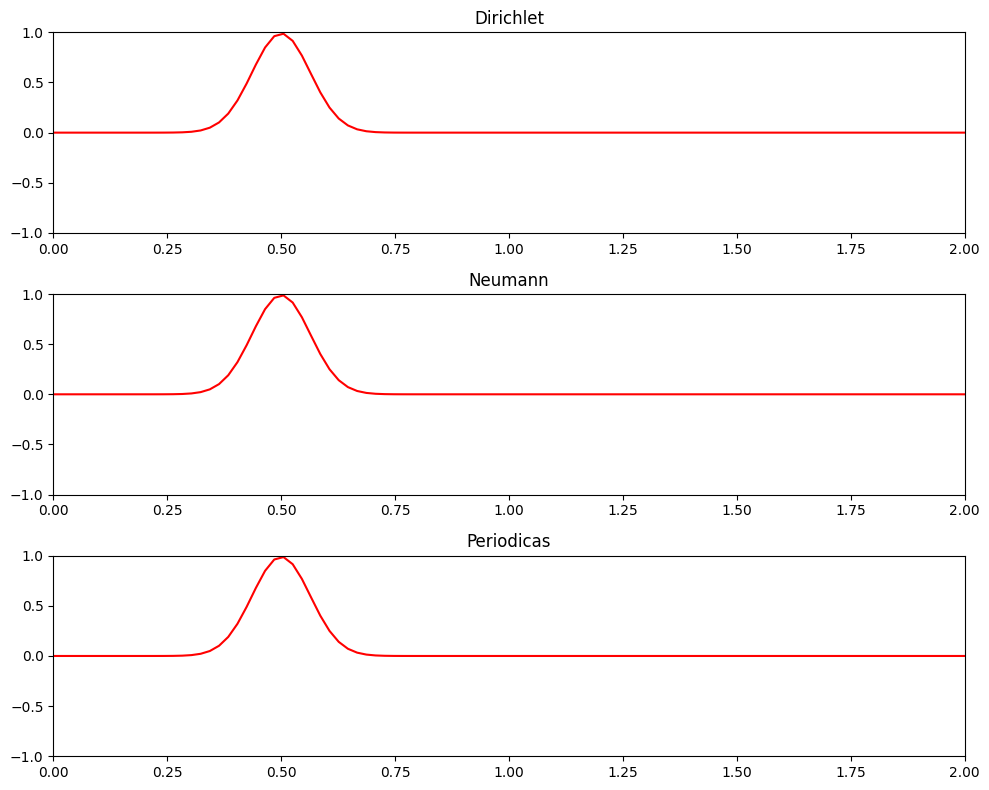

In [ ]:
# Animacion
fig, ax= plt.subplots(3,1,figsize=(10, 8))
titulos= ['Dirichlet','Neumann','Periodicas']

lines= []
for i in range(3):
    line,= ax[i].plot(x,u0,'r')
    lines.append(line)
    ax[i].set_title(titulos[i])
    ax[i].set_ylim(-1,1)
    ax[i].set_xlim(0,L)
plt.tight_layout()


# Combinada
def update_all(frame):
    lines[0].set_ydata(valores_dirichlet[frame])
    lines[1].set_ydata(valores_neumann[frame])
    lines[2].set_ydata(valores_periodicas[frame])
    return lines

ani= animation.FuncAnimation(fig,update_all,frames= Nt,interval= 50,blit=True)

In [ ]:
# Guardar en un archivo mp4
ani.save("SolucionDeOnda.mp4",writer="ffmpeg",fps=30)

plt.show()

El coeficiente de Courant es un criterio numérico esencial para garantizar la estabilidad en simulaciones de propagación de ondas. Si el valor de Courant es mayor que 1, la solución puede ser inestable y arrojar resultados incorrectos. Mantener
𝐶
≤
1
asegura que la simulación progrese de manera estable y físicamente coherente.

# Ecuación de onda bidimensional

**Condiciones de frontera de Dirichlet**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter

In [ ]:
# Parametros
c= 0.5
x_max= 2.0
y_max= 1.0
dx= 0.02
dy= 0.02
dt= 0.005
T= 5.0

In [ ]:
# Rendija
wx= 0.02
wy= 0.16

In [ ]:
# Discretizacion espacial
nx= int(x_max/dx)+1
ny= int(y_max/dy)+1
nt= int(T/dt)

In [ ]:
# Espacio de matrices de la onda
u= np.zeros((nx,ny))
u_prev= np.zeros((nx,ny))
u_next= np.zeros((nx,ny))

In [ ]:
# Condiciones iniciales
for i in range(nx):
    for j in range(ny):
        x = i * dx
        y = j * dy
        u[i, j] = np.exp(-150 * ((x - 0.5)**2 + (y - 0.5)**2))
        u_prev[i, j] = u[i, j] + dt * c * np.exp(-150 * ((x - 0.5)**2 + (y - 0.5)**2))

Text(0.5, 1.0, 'Simulación de Onda Bidimensional')

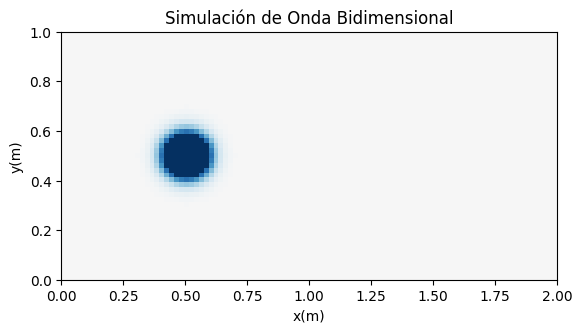

In [ ]:
# Grafico de animacion
fig,ax= plt.subplots()
im= ax.imshow(u.T,cmap='RdBu',extent=[0,x_max,0,y_max],origin='lower',vmin=-0.3,vmax=0.3)
ax.set_xlabel('x(m)')
ax.set_ylabel('y(m)')
ax.set_title('Simulación de Onda Bidimensional')

In [ ]:
# Actualizar la onda
def onda_drichlet(n):
    global u,u_prev,u_next

    #Dirichlet
    u[:, 0] = u[:, -1] = u[0, :] = u[-1, :] = 0

    # Rendija
    ix= int(1/dx)
    wy_min= int((y_max-wy)/2/dy)
    wy_max= int((y_max+wy)/2/dy)
    u[ix,:wy_min]= 0
    u[ix,wy_max:]= 0

    # Ecuacion de onda
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            u_next[i,j]= (2*u[i,j]-u_prev[i,j]  +  (c*dt/dx)**2  *(u[i+1,j]-2*u[i,j]+u[i-1,j])  + (c*dt/dy)**2  *(u[i,j+1]-2*u[i,j]+u[i,j-1]))

    # Actualiza matrice
    u_prev,u,u_next = u,u_next,u_prev

    # Actualiza animacion
    im.set_array(u.T)
    return [im]

In [ ]:
# Animacion
writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
with writer.saving(fig, "SimulacionDridchletBidimensional.mp4", 100):
    for n in range(nt):
        onda_drichlet(n)
        writer.grab_frame()

plt.close()

In [ ]:
# Espacio de matrices de la onda
u= np.zeros((nx,ny))
u_prev= np.zeros((nx,ny))
u_next= np.zeros((nx,ny))

In [ ]:
# Condiciones iniciales
for i in range(nx):
    for j in range(ny):
        x = i * dx
        y = j * dy
        u[i, j] = np.exp(-150 * ((x - 0.5)**2 + (y - 0.5)**2))
        u_prev[i, j] = u[i, j] + dt * c * np.exp(-150 * ((x - 0.5)**2 + (y - 0.5)**2))

In [ ]:
# Actualizar la onda
def ondan_neumann(n):
    global u,u_prev,u_next

    #Nuemann
    u[:,0]= -u[:,1]
    u[:,-1]= -u[:,-2]
    u[0,:]= -u[1,:]
    u[-1,:]= -u[-2,:]

    # Rendija
    ix= int(1/dx)
    wy_min= int((y_max-wy)/2/dy)
    wy_max= int((y_max+wy)/2/dy)
    u[ix,:wy_min]= 0
    u[ix,wy_max:]= 0

    # Ecuacion de onda
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            u_next[i,j]= (2*u[i,j]-u_prev[i,j]  +  (c*dt/dx)**2  *(u[i+1,j]-2*u[i,j]+u[i-1,j])  + (c*dt/dy)**2  *(u[i,j+1]-2*u[i,j]+u[i,j-1]))

    # Actualiza matrice
    u_prev,u,u_next = u,u_next,u_prev

    # Actualiza animacion
    im.set_array(u.T)
    return [im]

In [ ]:
# Animacion
writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
with writer.saving(fig, "SimulacionNeumannBidimensional.mp4", 100):
    for n in range(nt):
        ondan_neumann(n)
        writer.grab_frame()

plt.close()